<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Adjust-These" data-toc-modified-id="Adjust-These-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Adjust These</a></span></li><li><span><a href="#Preamble" data-toc-modified-id="Preamble-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Classes" data-toc-modified-id="Classes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Classes</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Main" data-toc-modified-id="Main-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Main</a></span></li><li><span><a href="#Measure" data-toc-modified-id="Measure-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Measure</a></span></li></ul></div>

# Adjust These

In [1]:
num_people = 100
mean_connections = 5
num_days = 4
initial_states = {
    'inf': 0.1,
}
infection_rate = 0.1
recovery_rate = 0.1
death_rate = 0.00

# Preamble

## Imports

In [2]:
from simulation_run import SimulationRun
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context('notebook')

## Classes

## Functions

In [3]:
pathogen = {
 'infection_rate': infection_rate,
 'recovery_rate': recovery_rate,
 'death_rate': death_rate,
 'spontaneous_rate': 0.0,
 'testing_accuracy': None,
 'immunity_period': 10**2,
 'contagious_period': 99,
 'incubation_period': 0
}

# Main

In [4]:
sim = SimulationRun(
    num_people=num_people,
    mean_connections=mean_connections,
    initial_states=initial_states,
    pathogen=pathogen,
    num_days=num_days,
)

+ Synthesizing population.


In [5]:
%%time 
sim.run()


+ Day 0
+ Population loaded.

+ Day 1
+ Population loaded.

+ Day 2
+ Population loaded.

+ Day 3
+ Population loaded.
CPU times: user 11.3 s, sys: 103 ms, total: 11.4 s
Wall time: 11.6 s


# Measure

In [6]:
days = sim.days

In [7]:
measurements = []

In [8]:
for i,day in enumerate(days):
    try:
        inf = day.starting_population.state.value_counts()['inf']
    except:
        inf = 0
    try:
        sus = day.starting_population.state.value_counts()['sus']
    except:
        sus = 0
    try:
        dead = day.starting_population.state.value_counts()['dead']
    except:
        dead = 0
        
    imm = sum(day.starting_population.immunity > 0)

    measure = {
        'day': i,
        'inf': inf,
        'sus': sus,
        'dead': dead,
        'imm': imm
    }

    measurements.append(measure)

In [9]:
data = pd.DataFrame(measurements)
data['sus_minus_imm'] = data.sus - data.imm
data['total_people'] = data.inf + data.sus + data.dead

In [10]:
sns.set()
sns.set_context('notebook')

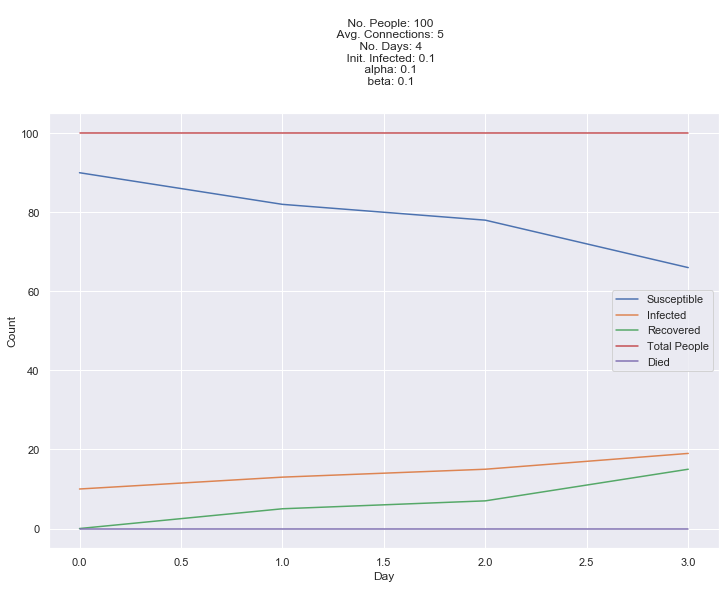

In [11]:
title = (
    '''
    No. People: {np}
    Avg. Connections: {ac}
    No. Days: {nd}
    Init. Infected: {ii}
    alpha: {ir}
    beta: {rr}
    
    '''
    .format(
        np=num_people,
        ac=mean_connections,
        ir=pathogen['infection_rate'],
        rr=pathogen['recovery_rate'],
        nd=num_days,
        ii=initial_states['inf']
    )
)
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
sns.lineplot(x='day',y='sus_minus_imm',data=data,ax=ax,label='Susceptible')
sns.lineplot(x='day',y='inf',data=data,ax=ax,label='Infected')
sns.lineplot(x='day',y='imm',data=data,ax=ax,label='Recovered')
sns.lineplot(x='day',y='total_people',data=data,ax=ax,label='Total People')
sns.lineplot(x='day',y='dead',data=data,ax=ax,label='Died')
_ = ax.set(xlabel='Day',ylabel='Count',title=title)

In [ ]:
Shift